<a href="https://colab.research.google.com/github/tfrizza/StyleGAN2-Tensorflow-2.0/blob/master/fashion_gen_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install tensorflow-io

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import os

import tensorflow as tf
# import tensorflow_io as tfio

In [6]:
# DATASET_PATH = '/content/drive/My Drive/Datasets/Fashion-Gen Dataset'
DATASET_PATH = 'data'
TRAIN_PATH = os.path.join(DATASET_PATH, 'fashiongen_256_256_validation.h5')
TRAIN_PATH

'data/fashiongen_256_256_validation.h5'

In [15]:
!git clone https://github.com/tfrizza/StyleGAN2-Tensorflow-2.0.git

Cloning into 'StyleGAN2-Tensorflow-2.0'...
remote: Enumerating objects: 58, done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (58/58), done.


In [18]:
!git pull

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 2), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/tfrizza/StyleGAN2-Tensorflow-2.0
   77e0e71..a84de07  master     -> origin/master
Updating 77e0e71..a84de07
Fast-forward
 stylegan_two_refactored.py | 649 +++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 649 insertions(+)
 create mode 100644 stylegan_two_refactored.py


In [16]:
cd StyleGAN2-Tensorflow-2.0/

/content/StyleGAN2-Tensorflow-2.0


In [7]:
with h5py.File(TRAIN_PATH, 'r') as f:
    head = {}
    for k in f.keys():
        if k == 'input_image': continue
        head[k] = np.squeeze(f[k][:20])
pd.DataFrame(head)

index  index_2           input_brand      input_category  \
0      24        0             b'Diesel'  b'JACKETS & COATS'   
1      25        1             b'Diesel'  b'JACKETS & COATS'   
2      26        2             b'Diesel'  b'JACKETS & COATS'   
3      27        3             b'Diesel'  b'JACKETS & COATS'   
4      73        4          b'Dsquared2'            b'JEANS'   
5      74        5          b'Dsquared2'            b'JEANS'   
6      75        6          b'Dsquared2'            b'JEANS'   
7      76        7          b'Dsquared2'            b'JEANS'   
8      93        8  b'Diesel Black Gold'  b'JACKETS & COATS'   
9      94        9  b'Diesel Black Gold'  b'JACKETS & COATS'   
10     95       10  b'Diesel Black Gold'  b'JACKETS & COATS'   
11     96       11  b'Diesel Black Gold'  b'JACKETS & COATS'   
12    177       12          b'Dsquared2'            b'JEANS'   
13    178       13          b'Dsquared2'            b'JEANS'   
14    179       14          b'Dsquared2'            b'JEANS'   
15    180       15          b'Dsquared2'            b'JEANS'   
16    189       16          b'Dsquared2'            b'PANTS'   
17    190       17          b'Dsquared2'            b'PANTS'   
18    191       18          b'Dsquared2'            b'PANTS'   
19    192       19          b'Dsquared2'            b'PANTS'   

                                    input_composition  \
0           b'90% cotton, 8% polyester, 2% elastane.'   
1           b'90% cotton, 8% polyester, 2% elastane.'   
2           b'90% cotton, 8% polyester, 2% elastane.'   
3           b'90% cotton, 8% polyester, 2% elastane.'   
4                         b'98% cotton, 2% elastane.'   
5                         b'98% cotton, 2% elastane.'   
6                         b'98% cotton, 2% elastane.'   
7                         b'98% cotton, 2% elastane.'   
8   b'Body: 100% lambskin. Contrast: 100% goatskin...   
9   b'Body: 100% lambskin. Contrast: 100% goatskin...   
10  b'Body: 100% lambskin. Contrast: 100% goatskin...   
11  b'Body: 100% lambskin. Contrast: 100% goatskin...   
12                        b'98% cotton, 2% elastane.'   
13                        b'98% cotton, 2% elastane.'   
14                        b'98% cotton, 2% elastane.'   
15                        b'98% cotton, 2% elastane.'   
16                        b'97% cotton, 3% elastane.'   
17                        b'97% cotton, 3% elastane.'   
18                        b'97% cotton, 3% elastane.'   
19                        b'97% cotton, 3% elastane.'   

                             input_concat_description input_department  \
0   b'Denim-like jogg jacket in blue. Fading and w...      b'CLOTHING'   
1   b'Denim-like jogg jacket in blue. Fading and w...      b'CLOTHING'   
2   b'Denim-like jogg jacket in blue. Fading and w...      b'CLOTHING'   
3   b'Denim-like jogg jacket in blue. Fading and w...      b'CLOTHING'   
4   b'Slim-fit jeans in light grey. Distressing an...      b'CLOTHING'   
5   b'Slim-fit jeans in light grey. Distressing an...      b'CLOTHING'   
6   b'Slim-fit jeans in light grey. Distressing an...      b'CLOTHING'   
7   b'Slim-fit jeans in light grey. Distressing an...      b'CLOTHING'   
8   b'Long sleeve suede jacket in black. Tonal gra...      b'CLOTHING'   
9   b'Long sleeve suede jacket in black. Tonal gra...      b'CLOTHING'   
10  b'Long sleeve suede jacket in black. Tonal gra...      b'CLOTHING'   
11  b'Long sleeve suede jacket in black. Tonal gra...      b'CLOTHING'   
12  b'Slim-fit jeans in dark blue. Distressing thr...      b'CLOTHING'   
13  b'Slim-fit jeans in dark blue. Distressing thr...      b'CLOTHING'   
14  b'Slim-fit jeans in dark blue. Distressing thr...      b'CLOTHING'   
15  b'Slim-fit jeans in dark blue. Distressing thr...      b'CLOTHING'   
16  b'Slim-fit trousers in navy. Four-pocket styli...      b'CLOTHING'   
17  b'Slim-fit trousers in navy. Four-pocket styli...      b'CLOTHING'   
18  b'Slim-fit trousers in navy. Four-pocket styli...  

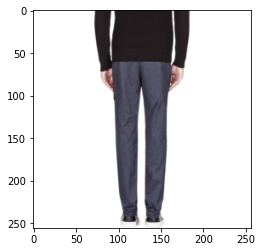

In [56]:
plt.imshow(f['input_image'][17])

In [8]:
def h5_gen():
    with h5py.File(TRAIN_PATH, 'r') as hf:
        for im in hf["input_image"]:
            yield im

def train_preprocess(image):
    image /= 255

    #Make sure the image is still in [0, 1]
    # image = tf.clip_by_value(image, 0.0, 1.0)

    return image

In [9]:
N_TRAIN_IMGS = 260480
BATCH_SIZE = 32

dataset = tf.data.Dataset.from_generator(
     h5_gen,
     (tf.int64),
     (tf.TensorShape([256,256,3]))
)

# Shuffle, repeat, batch     
# dataset = dataset.shuffle(N_TRAIN_IMGS)     
dataset = dataset.map(train_preprocess, num_parallel_calls=4)
dataset = dataset.repeat()
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(1)
dataset

<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float64>

In [10]:
import importlib
import stylegan_two_refactored
importlib.reload(stylegan_two_refactored)

<module 'stylegan_two_refactored' from '/Users/tfrizza/Documents/ai-fashion/StyleGAN2-Tensorflow-2.0/stylegan_two_refactored.py'>

In [12]:
model = stylegan_two_refactored.StyleGAN(dataset, lr = 0.0001, silent = False)
model.evaluate(0)

while model.GAN.steps < 1001:
    model.train()

TypeError: Dimension value must be integer or None or have an __index__ method, got 256.0